In [54]:
gpu_id = 0
import data_handler
import dilated_model as DM
import trainer as T
import numpy as np
import torch as th
from torch.autograd import Variable
import sys, os
os.environ["CUDA_VISIBLE_DEVICES"] = str(gpu_id)
from os.path import basename, splitext

th.multiprocessing.set_sharing_strategy('file_system')
name = splitext(basename(sys.argv[0]))[0]

transformations = [
    data_handler.Crop(6000),
    #data_handler.Threshold(sigma=2.2),
    data_handler.RandomMultiplier(-1),
    data_handler.Spectogram(30)
]

dataset = data_handler.DataSet(
    'data/raw/training2017/REFERENCE.csv', data_handler.load_composed,
    transformations=transformations,
    path='data/raw/training2017/',
    remove_noise=True, tokens='NAO')
train_set, eval_set = dataset.disjunct_split(.9)

train_producer = th.utils.data.DataLoader(
        dataset=train_set, batch_size=128, shuffle=True,
        num_workers=0, collate_fn=data_handler.batchify)
test_producer = th.utils.data.DataLoader(
        dataset=eval_set, batch_size=64, shuffle=True,
        num_workers=0, collate_fn=data_handler.batchify)

net = DM.EncodeWideResNet(in_channel=46, init_channel=16, num_enc_layer=4, N_res_in_block=1, use_selu=True)

EncodeWideResNet (
  (nonlin): SELU (
  )
  (encoder): Sequential (
    (0): Conv1d(46, 16, kernel_size=(7,), stride=(1,), padding=(3,))
    (1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True)
    (2): SELU (
    )
    (3): MaxPool1d (size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv1d(16, 32, kernel_size=(7,), stride=(1,), padding=(3,))
    (5): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True)
    (6): SELU (
    )
    (7): MaxPool1d (size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv1d(32, 64, kernel_size=(7,), stride=(1,), padding=(3,))
    (9): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True)
    (10): SELU (
    )
    (11): MaxPool1d (size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv1d(64, 128, kernel_size=(7,), stride=(1,), padding=(3,))
    (13): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True)
    (14): SELU (
    )
    (15): MaxPool1d (size=2, stride=2, padding=0, dilation=1, ceil_mode=Fal

In [55]:
#scratch_net.cuda()
data = next(iter(train_set))

#test_data = Variable(raw_data['x'].float())

print(data['x'].size())

batch = next(iter(train_producer))
print(batch['x'].size())

torch.Size([1, 16, 399])
torch.Size([128, 16, 399]) torch.Size([1, 16, 399])
torch.Size([128, 16, 399]) torch.Size([1, 16, 399])
torch.Size([128, 16, 399]) torch.Size([1, 16, 399])
torch.Size([128, 16, 399]) torch.Size([1, 16, 356])
torch.Size([128, 16, 399]) torch.Size([1, 16, 399])
torch.Size([128, 16, 399]) torch.Size([1, 16, 399])
torch.Size([128, 16, 399]) torch.Size([1, 16, 399])
torch.Size([128, 16, 399]) torch.Size([1, 16, 399])
torch.Size([128, 16, 399]) torch.Size([1, 16, 399])
torch.Size([128, 16, 399]) torch.Size([1, 16, 399])
torch.Size([128, 16, 399]) torch.Size([1, 16, 399])
torch.Size([128, 16, 399]) torch.Size([1, 16, 399])
torch.Size([128, 16, 399]) torch.Size([1, 16, 399])
torch.Size([128, 16, 399]) torch.Size([1, 16, 399])
torch.Size([128, 16, 399]) torch.Size([1, 16, 399])
torch.Size([128, 16, 399]) torch.Size([1, 16, 399])
torch.Size([128, 16, 399]) torch.Size([1, 16, 351])
torch.Size([128, 16, 399]) torch.Size([1, 16, 399])
torch.Size([128, 16, 399]) torch.Size([

In [56]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12, 8.0]

In [50]:
np.log(data['x'].squeeze().numpy()).std(), (data['x'].squeeze().numpy()).std()

(4.5540832300547898, 0.041704974418872137)

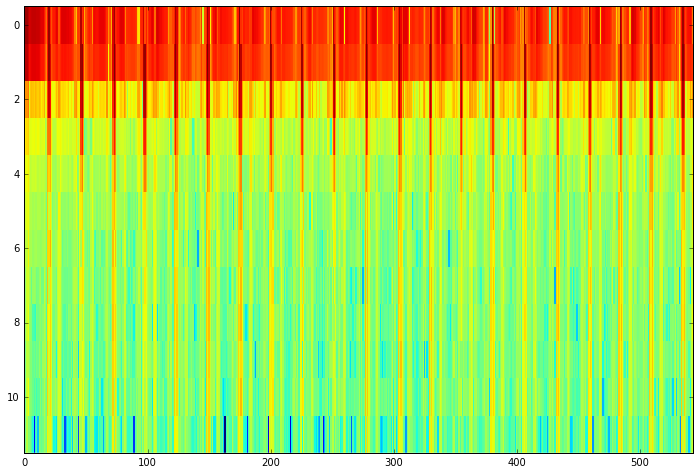

In [51]:
plt.imshow(np.log(data['x'].squeeze().numpy()), interpolation='None', aspect='auto')
plt.show()

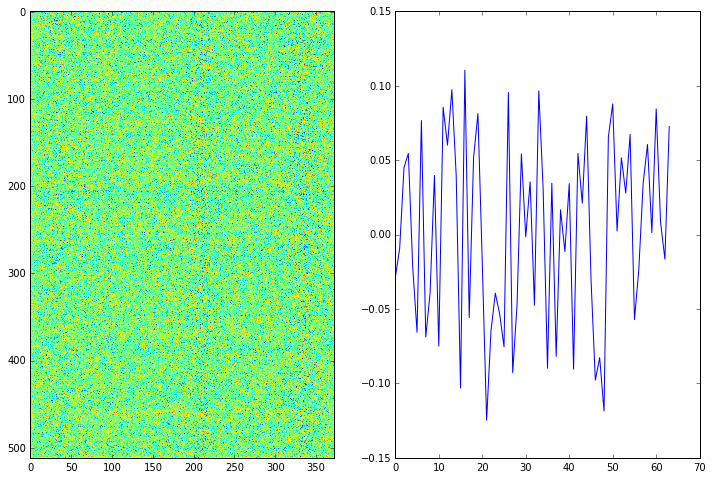

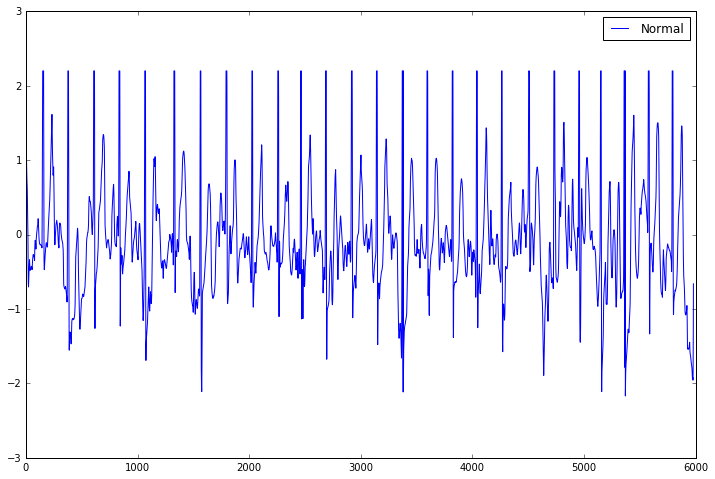

In [5]:

#%time scratch_res = scratch_net.forward_features(test_data)
#%time loaded_res = loaded_net.forward_features(test_data)

plt.subplot(1, 2, 1)
plt.imshow(scratch_res.data.numpy()[0], interpolation='None', aspect='auto')
plt.subplot(1, 2, 2)

#plt.barh(range(scratch_net.logit.weight.size(1)),
#         )
plt.plot(scratch_net.logit.weight.squeeze().data.numpy()[raw_data['y']])
plt.show()

plt.plot(test_data.cpu().data.numpy()[0, 0], label=['Normal', 'Fibrillation', 'Other'][raw_data['y']])
plt.legend()
plt.show()

#plt.imshow(loaded_res.data.numpy()[0], interpolation='None', aspect='auto')
#plt.show()


In [19]:
%%timeit
res = net.forward_features(test_data)

11.5 ms ± 26.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [22]:
%%time
res = net.forward_features(test_data).cpu()

CPU times: user 17.7 ms, sys: 3.95 ms, total: 21.6 ms
Wall time: 20.9 ms
